In [1]:
import pandas as pd #for data analysis.
import numpy as np #for mathematical operations
import matplotlib.pyplot as plt #b for data visualization
import seaborn as sns # used for data visualization
import csv 
import random #for generate random numbers

In [2]:
import sklearn #for classification, regression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

In [3]:
malData=pd.read_csv("C:/Users/KABIR\Ethical Project\MalwareDATA.csv",sep="|") #loading the dataset

In [4]:
malData.head() #used to get first n rows 

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [5]:
malData.shape  

(138047, 57)

In [6]:
malData.describe() # to generate descriptive statistics 

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [7]:
legit=malData[0:41323].drop(["legitimate"],axis=1)
mal=malData[41312::].drop(["legitimate"],axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features"  %(mal.shape[0],mal.shape[1])) #shape of legit and malware file

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96735 samples, 56 features


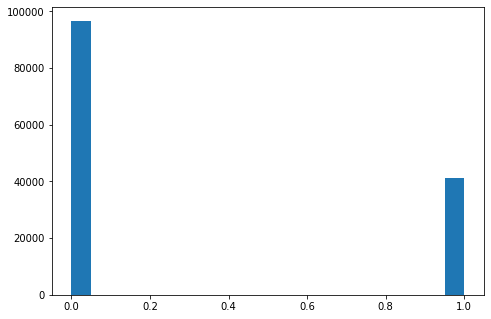

In [8]:
fig=plt.figure()            
ax=fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
plt.show()      

# Data Cleaning

In [9]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [10]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print("The name and md5 variables are removed successfully") #removing unwanted coloums

The name and md5 variables are removed successfully


# Spliting the database into test and train 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(malData,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(110437, 54)

# Model Building

# 1-Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier #importing random forest
from sklearn.datasets import make_classification    #for evaluation

clf=RandomForestClassifier(max_depth=2) 
randomModel=clf.fit(X_train,y_train)  #input variable,target data set variables 

# Random forest evaluation on test data 

In [14]:
from sklearn.metrics import f1_score,accuracy_score,plot_confusion_matrix,auc,confusion_matrix #f1 score good for unbalanced dataset

In [15]:
# Accuracy on the train dataset   
train_pred=randomModel.predict(X_train)
accuracy_score(y_train,train_pred)

0.9828952253320898

In [16]:
# Accuracy on the test dataset
prediction=randomModel.predict(X_test)
accuracy_score(y_test,prediction) 

0.9839188699746468

In [17]:
f1_score(y_test,prediction)

0.9733365361518136

# confusion matrix 

C:\Users\KABIR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


confusion matrix, without normaliztion
[[19062   188]
 [  256  8104]]


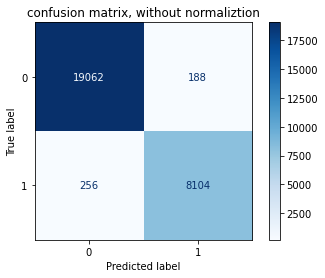

C:\Users\KABIR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99023377 0.00976623]
 [0.03062201 0.96937799]]


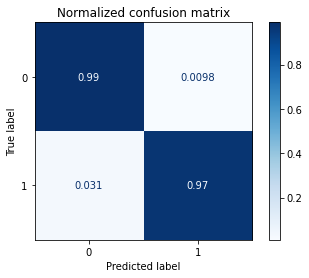

In [18]:
titles_options=[("confusion matrix, without normaliztion",None),
                         ("Normalized confusion matrix",'true')]
for title, normalize in titles_options:
    disp=plot_confusion_matrix(randomModel,X_test,y_test, 
                              # display_labels='legitimate',
                               cmap=plt.cm.Blues,
                               normalize=normalize)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
    plt.show()  
    
    
    

# 2 - logistic regression  

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
logModel=clf.fit(X_train,y_train)

C:\Users\KABIR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation 

In [20]:
# Accuracy on the train dataset
train_log=logModel.predict(X_train)
accuracy_score(y_train,train_log) 

0.7015221347917817

In [21]:
#Accuracy on the test dataset
pred=logModel.predict(X_test)
accuracy_score(y_test,pred) 

0.6972111553784861

In [22]:
f1_score(y_test,pred)

0.0

C:\Users\KABIR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


confusion matrix, without normaliztion
[[19250     0]
 [ 8360     0]]


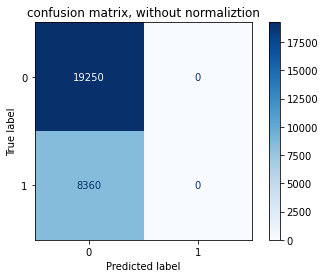

C:\Users\KABIR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


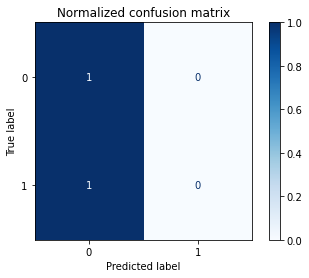

In [23]:
titles_options=[("confusion matrix, without normaliztion",None),
                         ("Normalized confusion matrix",'true')]
for title, normalize in titles_options:
    disp=plot_confusion_matrix(logModel,X_test,y_test, 
                              # display_labels='legitimate',
                               cmap=plt.cm.Blues,
                               normalize=normalize)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
    plt.show()  
    
    
    

# 3 - Neural Network 

In [24]:
import tensorflow as tf # fast numerical computing 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# Define model
model =Sequential()
model.add(Dense(16,input_dim=54,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary() #print model summary 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                880       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [26]:
#comile model
model.compile(loss="binary_crossentropy", optimizer = "rmsprop",metrics=["accuracy"])

In [27]:
#Fir modl
model.fit(X_train,y_train,epochs=5,batch_size=32) # number of passes of the entire training dataset algorithm has completed.

Epoch 1/5
3452/3452 [==============================] - 4s 1ms/step - loss: 10158.8955 - accuracy: 0.7014
Epoch 2/5
3452/3452 [==============================] - 5s 1ms/step - loss: 978.3200 - accuracy: 0.7015
Epoch 3/5
3452/3452 [==============================] - 4s 1ms/step - loss: 621.1749 - accuracy: 0.7015
Epoch 4/5
3452/3452 [==============================] - 4s 1ms/step - loss: 337.2825 - accuracy: 0.7015
Epoch 5/5
3452/3452 [==============================] - 4s 1ms/step - loss: 74.9086 - accuracy: 0.7015


In [28]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>=0.8 else 0   for y in trainPred]
accuracy_score(y_train,trainPred)

0.7015402446643788

In [29]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)
y_prediction=[1 if y>=0.2 else 0   for y in y_prediction]
accuracy_score(y_test,y_prediction)


0.303694313654473

In [30]:
confusion_matrix(y_test,y_prediction) 

array([[   25, 19225],
       [    0,  8360]], dtype=int64)

In [31]:
f1_score(y_test,y_prediction) 

0.4651550980664905